# <img style="float: left; padding-right: 10px; width: 80px" src="https://raw.githubusercontent.com/trivikverma/researchgroup/master/static/media/resources/epa1316/TU_descriptor%20black.png"> EPA-1316 Introduction to *Urban* Data Science 


## Lab 4: Geo-Visualisation

**TU Delft**<br>
**Q1 2020**<br>
**Instructor:** Trivik Verma <br>
**TAs:** Aarthi Meenakshi Sundaram, Jelle Egbers, Tess Kim, Lotte Lourens, Amir Ebrahimi Fard, Giulia Reggiani, Bramka Jafino <br>
**[Computational Urban Science & Policy Lab](https://research.trivikverma.com/)** <br>

---


# Mapping in Python with `geopandas`

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import geopandas as gpd
import palettable as pltt
from seaborn import palplot

In this lab, we will learn how to load, manipulate and visualize spatial data. In some senses, spatial data have become so pervasive that nowadays, they are usually included simply as "one more column" in a table. However, *spatial is special* sometimes and there are few aspects in which geographic data differ from standard numerical tables. In this session, we will extend the skills developed in the previous one about non-spatial data, and combine them. In the process, we will discover that, although with some particularities, dealing with spatial data in Python largely resembles dealing with non-spatial data. 

For example, in this lab you will learn to make slick maps like this one with just a few commands:

![](figs/lab03_liverpool_lsoas_wa.png)


To learn these concepts, we will be playing with the geography of Liverpool. In particular we will use Census geographies (Available as part of the Census Data pack used before, see [link](https://data.cdrc.ac.uk/dataset/cdrc-2011-census-data-packs-for-local-authority-district-liverpool-e08000012)) and Ordnance Survey geospatial data, available to download also from the CDRC data store ([link](https://data.cdrc.ac.uk/dataset/cdrc-2015-os-geodata-pack-liverpool-e08000012)). To make the rest of the notebook easier to follow, let us set the paths to the main two folders here. We will call the path to the Liverpool Census pack `lcp_dir`, and that to the OS geodata `los_dir`:

In [2]:
# This might have to look different in your computer
lcp_dir = 'data/Liverpool/'
los_dir = 'data/E08000012/'

**IMPORTANT**: the paths above might have look different in your computer. See [this introductory notebook](begin.html) for more details about how to set your paths.

## Loading up spatial data

The most direct way to get from a file to a quick visualization of the data is by loading it as a `GeoDataFrame` and calling the `plot` command. The main library employed for all of this is `geopandas` which is a geospatial extension of the `pandas` library, already introduced before. `geopandas` supports exactly the same functionality that `pandas` does (in fact since it is built on top of it, so most of the underlying machinery is pure `pandas`), plus a wide range of spatial counterparts that make manipulation and general "munging" of spatial data very similar to non-spatial tables.

In two lines of code, we will obtain a graphical representation of the spatial data contained in a file that can be in many formats; actually, since it uses the same drivers under the hood, you can load pretty much the same kind of vector files that QGIS permits. Let us start by plotting single layers in a crude but quick form, and we will build style and sophistication into our plots later on.

* Polygons

Let us begin with the most common type of spatial data in the social science: polygons. For example, we can load the geography of LSOAs in Liverpool with the following lines of code:

In [3]:
lsoas_link = lcp_dir + 'shapefiles/Liverpool_lsoa11.shp'
lsoas = gpd.read_file(lsoas_link)
type(lsoas)

geopandas.geodataframe.GeoDataFrame

Now `lsoas` is a `GeoDataFrame`. Very similar to a traditional, non-spatial `DataFrame`, but with an additional column called `geometry`:

In [4]:
lsoas.head()

,LSOA11CD,geometry
0,E01006512,"POLYGON ((336103.358 389628.580, 336103.416 38..."
1,E01006513,"POLYGON ((335173.781 389691.538, 335169.798 38..."
2,E01006514,"POLYGON ((335495.676 389697.267, 335495.444 38..."
3,E01006515,"POLYGON ((334953.001 389029.000, 334951.000 38..."
4,E01006518,"POLYGON ((335354.015 388601.947, 335354.000 38..."


This allows us to quickly produce a plot by executing the following line:

<AxesSubplot:>

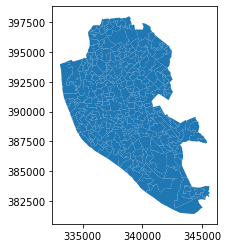

In [5]:
lsoas.plot()

This might not be the most aesthetically pleasant visual representation of the LSOAs geography, but it is hard to argue that it is not quick to produce. We will work on styling and customizing spatial plots later on.

**Pro-tip**: if you call a single row of the `geometry` column, it'll return a small plot ith the shape:

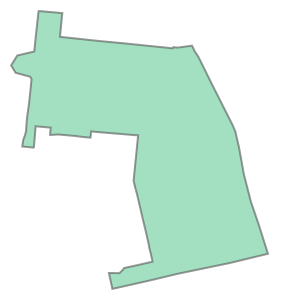

In [6]:
lsoas.loc[0, 'geometry']

* Lines

Displaying lines is as straight-forward as polygons. To load railway tunnels in Liverpool and name the rows after the `id` column (or to "index" them):

In [7]:
# Read file with tunnel
rwy_tun = gpd.read_file(los_dir + 'RailwayTunnel.shp')
# Index it on column `id`
rwy_tun = rwy_tun.set_index('id')
# Print summary info
rwy_tun.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 44 entries, 0ACD196C321E4F8DE050A00A568A6F6F to 0ACD196C313D4F8DE050A00A568A6F6F
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   featcode  44 non-null     float64 
 1   geometry  44 non-null     geometry
dtypes: float64(1), geometry(1)
memory usage: 1.0+ KB


Note how, similarly to the polygon case, if we pick the `"geometry"` column of a table with lines, a single row will display the geometry as well:

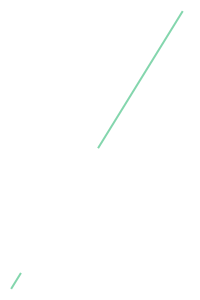

In [8]:
rwy_tun.loc['0ACD196C313D4F8DE050A00A568A6F6F', 'geometry']

Note how we have also indexed the table on the `id` column.

A quick plot is similarly generated by (mind that because there are over 18,000 segments, this may take a little bit):

<AxesSubplot:>

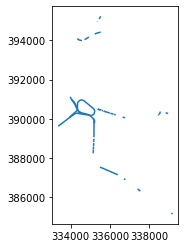

In [9]:
rwy_tun.plot()

Again, this is not the prettiest way to display the roads maybe, and you might want to change a few parameters such as colors, etc. All of this is possible, as we will see below, but this gives us a quick check of what lines look like.

---

## Exercise: Obtain the graphical representation of the line with `id` = `0ACD196C32214F8DE050A00A568A6F6F`.

<!--
rwy_tun.loc['0ACD196C313D4F8DE050A00A568A6F6F', 'geometry']
-->

---

* Points

Finally, points follow a similar structure. If we want to represent named places in Liverpool:

In [10]:
namp = gpd.read_file(los_dir + 'NamedPlace.shp')
namp.head()

,id,distname,htmlname,classifica,fontheight,orientatio,featcode,geometry
0,0EE7A103C03A8FBFE050A00A568A2502,Sugar Brook,Sugar Brook,Hydrography,Small,25.0,15804.0,POINT (339605.000 396261.000)
1,0EE7A104A4B68FBFE050A00A568A2502,Sandfield Park,Sandfield Park,Landcover,Small,0.0,15805.0,POINT (339758.000 392357.000)
2,0EE7A1041DB18FBFE050A00A568A2502,Sandfield Park,Sandfield Park,Populated Place,Medium,0.0,15801.0,POINT (339768.000 392217.000)
3,0EE7A1041DE48FBFE050A00A568A2502,Gillmoss,Gillmoss,Populated Place,Medium,0.0,15801.0,POINT (340269.000 396567.000)
4,0EE7A1041DE58FBFE050A00A568A2502,Croxteth,Croxteth,Populated Place,Medium,0.0,15801.0,POINT (340296.000 395304.000)


And the plot is produced by running:

<AxesSubplot:>

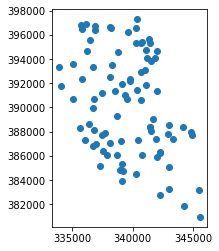

In [11]:
namp.plot()

## Styling plots

It is possible to tweak several aspects of a plot to customize if to particular needs. In this section, we will explore some of the basic elements that will allow us to obtain more compelling maps.

**NOTE**: some of these variations are very straightforward while others are more intricate and require tinkering with the internal parts of a plot. They are not necessarily organized by increasing level of complexity.

* Changing transparency

The intensity of color of a polygon can be easily changed through the `alpha` attribute in plot. This is specified as a value betwee zero and one, where the former is entirely transparent while the latter is the fully opaque (maximum intensity):

<AxesSubplot:>

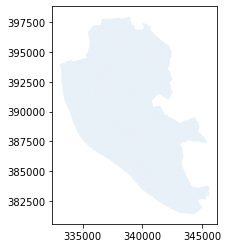

In [12]:
lsoas.plot(alpha=0.1)

<AxesSubplot:>

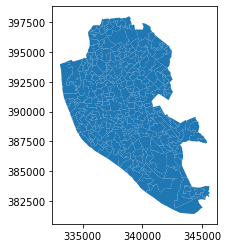

In [13]:
lsoas.plot(alpha=1)

* Removing axes

Although in some cases, the axes can be useful to obtain context, most of the times maps look and feel better without them. Removing the axes involves wrapping the plot into a figure, which takes a few more lines of aparently useless code but that, in time, it will allow you to tweak the map further and to create much more flexible designs:

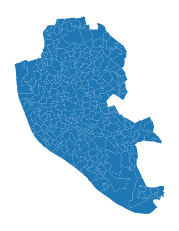

In [14]:
# Setup figure and axis
f, ax = plt.subplots(1)
# Plot layer of polygons on the axis
lsoas.plot(ax=ax)
# Remove axis frames
ax.set_axis_off()
# Display
plt.show()

Let us stop for a second a study each of the previous lines:

1. We have first created a figure named `f` with one axis named `ax` by using the command `plt.subplots` (part of the library `matplotlib`, which we have imported at the top of the notebook). Note how the method is returning two elements and we can assign each of them to objects with different name (`f` and `ax`) by simply listing them at the front of the line, separated by commas.
1. Second, we plot the geographies as before, but this time we tell the function that we want it to draw the polygons on the axis we are passing, `ax`. This method returns the axis with the geographies in them, so we make sure to store it on an object with the same name, `ax`.
1. On the third line, we effectively remove the box with coordinates.
1. Finally, we draw the entire plot by calling `plt.show()`.

* Adding a title

Adding a title is an extra line, if we are creating the plot within a figure, as we just did. To include text on top of the figure:

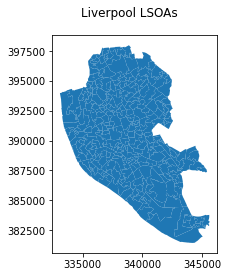

In [15]:
# Setup figure and axis
f, ax = plt.subplots(1)
# Add layer of polygons on the axis
lsoas.plot(ax=ax)
# Add figure title
f.suptitle('Liverpool LSOAs')
# Display
plt.show()

* Changing the size of the map

The size of the plot is changed equally easily in this context. The only difference is that it is specified when we create the figure with the argument `figsize`. The first number represents the width, the X axis, and the second corresponds with the height, the Y axis.

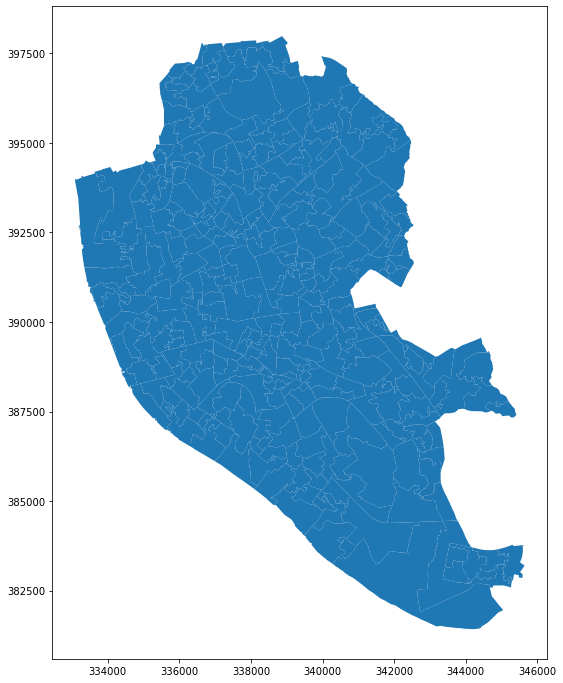

In [16]:
# Setup figure and axis with different size
f, ax = plt.subplots(1, figsize=(12, 12))
# Add layer of polygons on the axis
lsoas.plot(ax=ax)
# Display
plt.show()

* Scaling plots

You will notice that the ability to change the size of the figure is very powerful as it makes possible to obtain many different sizes and shapes for plots. However, this also may introduce some distortions in the way the shapes are represented. For example, a very wide figure can make the viewer think that polygons are in reality more "stretched out" than they are in reality:

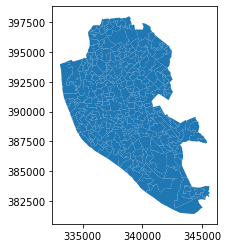

In [17]:
# Setup figure and axis with different size
f, ax = plt.subplots(1, figsize=(12, 4))
# Add layer of polygons on the axis
ax = lsoas.plot(ax=ax)
# Display
plt.show()

Although in some contexts this may be desirable (or at least, accepted), in many it will not. From a cartographic point of view, maps need to be as good representatios of reality as they can. We can ensure the scaling ratio between both axes remains fixed, whichever the shape of the figure. To do this, we only need to add a single extra line of code: `plt.axis("equal")`.

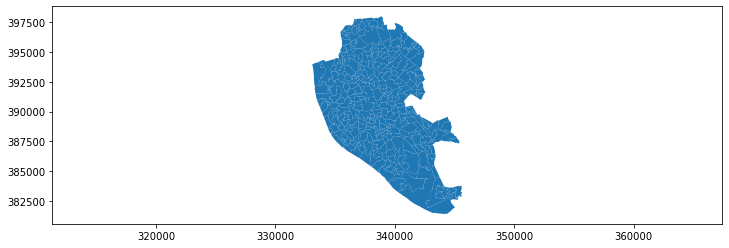

In [18]:
# Setup figure and axis with different size
f, ax = plt.subplots(1, figsize=(12, 4))
# Add layer of polygons on the axis
lsoas.plot(ax=ax)
# Force axis to be on the same unit
plt.axis('equal')
# Display
plt.show()

* Modifying borders

Border lines sometimes can distort or impede proper interpretation of a map. In those cases, it is useful to know how they can be modified. Although not too complicated, the way to access borders in `geopandas` is not as straightforward as it is the case for other aspects of the map, such as size or frame. Let us first see the code to make the *lines thinner* and *grey*, and then we will work our way through the different steps:

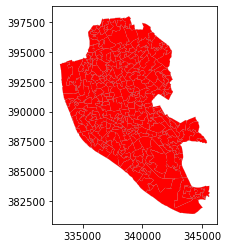

In [19]:
# Setup figure and axis
f, ax = plt.subplots(1)
# Add layer of polygons on the axis, set fill color (`facecolor`) and boundary
# color (`edgecolor`)
lsoas.plot(linewidth=0.1, facecolor='red', edgecolor='grey', ax=ax)
# Display
plt.show()

Note how the lines are much thinner and discreet. In addition, all the polygons are colored in the same (default) color, light red.

Let us examine line by line what we are doing in the code snippet:

* We begin by creating the figure (`f`) object and one axis inside it (`ax`) where we will plot the map.
* Then, we call `plot` as usual, but pass in two new arguments: `facecolor`, to control the color each polygon is filled with, and `edgecolor`, to control the color of the boundary.
* Draw the map using `plt.show()`.

This approach works very similarly with other geometries, such as lines. For example, if we wanted to plot the railway tunnels in red, we would simply:

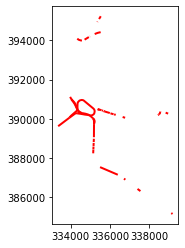

In [20]:
# Setup figure and axis
f, ax = plt.subplots(1)
# Add layer with lines, set them red and with different line width
# and append it to the axis `ax`
rwy_tun.plot(linewidth=2, color='red', ax=ax)
# Display
plt.show()

Important, note that in the case of lines the parameter to control the color is simply `color`. This is because lines do not have an area, so there is no need to distinguish between the main area (`facecolor`) and the border lines (`edgecolor`).

* Transforming CRS

The coordindate reference system (CRS) is the way geographers and cartographers have to represent a three-dimentional object, such as the round earth, on a two-dimensional plane, such as a piece of paper or a computer screen. If the source data contain information on the CRS of the data, we can modify this in a `GeoDataFrame`. First let us check if we have the information stored properly:

In [21]:
lsoas.crs

<Projected CRS: PROJCS["Transverse_Mercator",GEOGCS["GCS_OSGB 1936 ...>
Name: Transverse_Mercator
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Transverse Mercator
Datum: OSGB 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

As we can see, there is information stored about the reference system: it is using the datum "OSGB36", which is a projection in meters (`m` in units). There are also other less decipherable parameters but we do not need to worry about them right now.

If we want to modify this and "reproject" the polygons into a different CRS, the quickest way is to find the [EPSG](https://en.wikipedia.org/wiki/International_Association_of_Oil_%26_Gas_Producers#European_Petroleum_Survey_Group) code online ([epsg.io](http://epsg.io/) is a good one, although there are others too). For example, if we wanted to transform the dataset into lat/lon coordinates, we would use its EPSG code, 4326:

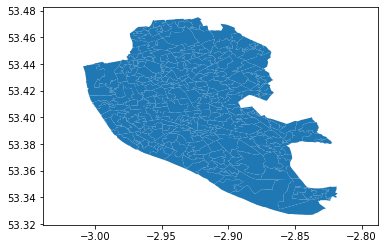

In [22]:
# Reproject (`to_crs`) and plot (`plot`) polygons
lsoas.to_crs(epsg=4326).plot()
# Set equal axis
lims = plt.axis('equal')

Because the area we are visualizing is not very large, the shape of the polygons is roughly the same. However, note how the *scale* in which they are plotted differs: while before we had coordinate points ranging 332,000 to 398,000, now these are expressed in degrees, and range from -3.05 to -2,80 on the longitude, and between 53.32 and 53.48 on the latitude.

---

## Exercise: Make a map of the LSOAs that features the following characteristics:

* Includes a title
* Does not include axes frame
* It is proportioned and has a figure size of 10 by 11.
* Polygons are all in the color "#525252" and fully opaque.
* Lines have a width of 0.3 and are of color "#B9EBE3"


<!---
f, ax = plt.subplots(1, figsize=(10, 11))
for poly in lsoas['geometry']:
    gpd.plotting.plot_multipolygon(ax, poly, facecolor='#525252', linewidth=0.3, edgecolor='#B9EBE3')
ax.set_axis_off()
f.suptitle("LSOAs in Liverpool")
plt.axis('equal')
plt.savefig('figs/lab03_liverpool_lsoas.png', dpi=75)
plt.show()
-->

---

## Composing multi-layer maps

So far we have considered many aspects of plotting *a single* layer of data. However, in many cases, an effective map will require more than one: for example we might want to display streets on top of the polygons of neighborhoods, and add a few points for specific locations we want to highlight. At the very heart of GIS is the possibility to combine spatial information from different sources by overlaying it on top of each other, and this is fully supported in Python.

Essentially, combining different layers on a single map boils down to adding each of them to the same axis in a sequential way, as if we were literally overlaying one on top of the previous one. For example, let us get the most direct plot, one with the polygons from the LSOAs and the tunnels on top of them:

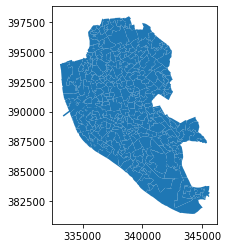

In [23]:
# Setup figure and axis
f, ax = plt.subplots(1)
# Add a layer with polygons on to axis `ax`
lsoas.plot(ax=ax)
# Add a layer with lines on top in axis `ax`
rwy_tun.plot(ax=ax)
# Display
plt.show()

Because the default colors are not really designed to mix and match several layers, it is hard to tell them apart. However, we can use all the skills and tricks learned on styling a single layer, to make a multi-layer more sophisticated and, ultimately, useful.

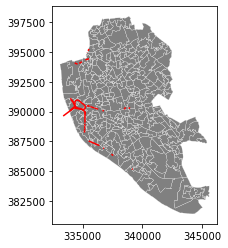

In [24]:
# Setup figure and axis
f, ax = plt.subplots(1)
# Add a layer with polygons on to axis `ax`
lsoas.plot(ax=ax, facecolor='grey', edgecolor='white', linewidth=0.2)
# Add a layer with lines on top in axis `ax`
rwy_tun.plot(ax=ax, color='red')
# Display
plt.show()

---

## Exercise: Create a similar map to the one above, but replace the railway tunnels by the named places points used at the beginning (and saved into `namp`). Do not try to set the color to green or any other particular one, but you can play with the size of the dot.

<!--
f, ax = plt.subplots(1)
# Plot polygons in light grey
for poly in lsoas['geometry']:
    gpd.plotting.plot_multipolygon(ax, poly, facecolor='grey', alpha=0.25, linewidth=0.1)
# Overlay points
for pt in namp['geometry']:
    gpd.plotting.plot_point(ax, pt, markersize=4)
plt.show()
-->

---

## Using palettes to create aesthetically pleasant maps

The choice of colors can influence the look and, ultimately, the effectiveness of a map. Although in some cases picking colors that simply allow you to distinguish the different elements might suffice, sometimes, you want to convey certain feelings (warmth, safety, etc.). In those cases, using preexisting palettes can be useful.

In this section, we will learn how to use pre-existent palettes to style your maps. We will be using the library [`palettable`](https://jiffyclub.github.io/palettable/), which provides many "canned" palettes. We will also use the handy function `palplot` (from the library `seaborn`) to examine the colors quickly.

For the sake of the example, let us use a palette based on one of Wes Anderson's movies, Darjeeling Limited:

<img src='http://66.media.tumblr.com/2815b755b493555dd4a74fc9f7c84bdb/tumblr_nj7cclt9qb1tvvqeko1_500.jpg'></img>

Here is how you can pull out those colors:

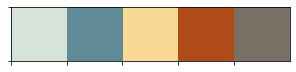

In [25]:
wes = pltt.wesanderson.Darjeeling2_5.hex_colors
palplot(wes)

Now, note how the object `wes` simply contains a list of colors in the hex standard:

In [26]:
wes

['#D5E3D8', '#618A98', '#F9DA95', '#AE4B16', '#787064']

We will use these to style our map. For the sake of the example, let us use the following layers, available from the OS pack:

* `TidalWater`
* `Road`
* `TidalBoundary`
* `FunctionalSite`
* And the LSOA polygons used above.

Let us first read those in:

In [27]:
# NOTE: this might take a little bit depending on the machine
tidW = gpd.read_file(los_dir+'TidalWater.shp')
tidB = gpd.read_file(los_dir+'TidalBoundary.shp')
funS = gpd.read_file(los_dir+'FunctionalSite.shp')
road = gpd.read_file(los_dir+'Road.shp')

Technically speaking, there is nothing new to learn, other than keeping in mind that we need to add the layers in the right order. Let's go for it:

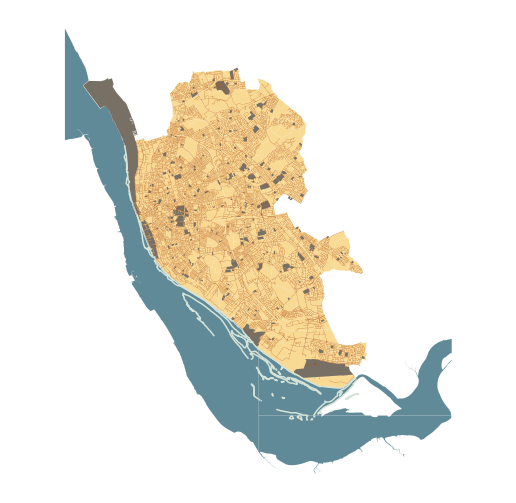

In [28]:
# NOTE: this might take a little bit depending on the machine

# Setup figure and axis
f, ax = plt.subplots(1, figsize=(9, 9))
# Add tidal water (remove boundary lines for the polygons)
tidW.plot(ax=ax, facecolor='#618A98', linewidth=0.)
# Add tidal boundaries
tidB.plot(ax=ax, color='#D5E3D8')
# Add LSOAs
lsoas.plot(ax=ax, facecolor='#F9DA95', edgecolor='#F9DA95', linewidth=0.)
# Add roads
road.plot(ax=ax, color='#AE4B16', linewidth=0.2)
# Add functional sites (remove boundary lines for the polygons)
funS.plot(ax=ax, facecolor='#787064', linewidth=0.)
# Remove axes
ax.set_axis_off()
# Impose same size for units across axes
plt.axis('equal')
# Display
plt.show()

## Saving maps to figures

Once we have produced a map we are content with, we might want to save it to a file so we can include it into a report, article, website, etc. Exporting maps in Python involves replacing `plt.show` by `plt.savefig` at the end of the code block to specify where and how to save it. For example to save the previous map into a `png` file in the same folder where the notebook is hosted:

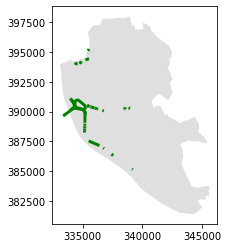

In [29]:
# Set up figure and axes
f, ax = plt.subplots(1)
# Plot polygon layer
lsoas.plot(ax=ax, facecolor='grey', alpha=0.25, linewidth=0.1)
# Plot line layer
rwy_tun.plot(ax=ax, color='green', linewidth=3)
# Save figure to a PNG file
plt.savefig('liverpool_railway_tunels.png')

If you now check on the folder, you'll find a `png` (image) file with the map.

The command `plt.savefig` contains a large number of options and additional parameters to tweak. Given the size of the figure created is not very large, we can increase this with the argument `dpi`, which stands for "dots per inch" and it's a standard measure of resolution in images. For example, for a high definition (HD) quality image, we can use 1080:

**[Note]**: if this takes too long, try with 500 instead, which will still give you a good quality image that renders more easily.

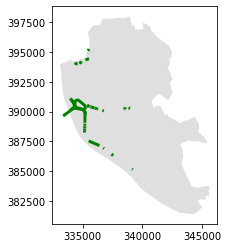

In [30]:
# Set up figure and axes
f, ax = plt.subplots(1)
# Plot polygon layer
lsoas.plot(ax=ax, facecolor='grey', alpha=0.25, linewidth=0.1)
# Plot line layer
rwy_tun.plot(ax=ax, color='green', linewidth=3)
# Save figure to a PNG file
plt.savefig('liverpool_railway_tunels.png', dpi=1080)

## Manipulating spatial tables (`GeoDataFrames`)

Once we have an understanding of how to visually display spatial information contained, let us see how it can be combined with the operations learnt in the previous session about manipulating non-spatial tabular data. Essentially, the key is to realize that a `GeoDataFrame` contains most of its spatial information in a single column named `geometry`, but the rest of it looks and behaves exactly like a non-spatial `DataFrame` (in fact, it is). This concedes them all the flexibility and convenience that we saw in manipulating, slicing, and transforming tabular data, with the bonus that spatial data is carried away in all those steps. In addition, `GeoDataFrames` also incorporate a set of explicitly spatial operations to combine and transform data. In this section, we will consider both.

Let us refresh some of the techniques we learned in the previous session about non-spatial tabular data and see how those can be combined with the mapping of their spatial counter-parts. To do this, we will revisit the population data we explored in the previous section:

In [31]:
import pandas as pd

# Set the path to the location of the Liverpool data from the first practical
# just as you did at the beginning of the previous session
tab_path = 'data/liv_pop.csv'

Remember the data we want need to be extracted and renamed for the variables to have human readable names. Here we will do it all in one shot, but you can go back to the notebook of the previous session to follow the steps in more detail.

In [32]:
# Read file in
lsoa_orig_sub = pd.read_csv(tab_path, index_col=0)
# Create column with totals by area
lsoa_orig_sub['Total'] = lsoa_orig_sub.sum(axis=1)
# Display top of table
lsoa_orig_sub.head()

,Europe,Africa,Middle East and Asia,The Americas and the Caribbean,Antarctica and Oceania,Total
GeographyCode,,,,,,
E01006512,910,106,840,24,0,1880
E01006513,2225,61,595,53,7,2941
E01006514,1786,63,193,61,5,2108
E01006515,974,29,185,18,2,1208
E01006518,1531,69,73,19,4,1696


* Join tabular data

Now we have both tables loaded into the session: on the one hand, the spatial data are contained in `lsoas`, while all the tabular data are in `lsoa_orig_sub`. To be able to work with the two together, we need to *connect* them. In `pandas` language, this is called "join" and the key element in joins are the *indices*, the names assigned to each row of the tables. This is what we determine, for example, when we indicate `index_col` when reading a `csv`. In the case above, the index is set on `GeographyCode`. In the case of the `GeoDataFrame`, there is not any specific index, but an unamed sequence. The spatial table does have however a column called `LSOA11CD` which represents the code for each polygon, and this one actually matches those in `GeographyCode` in the population table.

In [33]:
lsoas.head()

,LSOA11CD,geometry
0,E01006512,"POLYGON ((336103.358 389628.580, 336103.416 38..."
1,E01006513,"POLYGON ((335173.781 389691.538, 335169.798 38..."
2,E01006514,"POLYGON ((335495.676 389697.267, 335495.444 38..."
3,E01006515,"POLYGON ((334953.001 389029.000, 334951.000 38..."
4,E01006518,"POLYGON ((335354.015 388601.947, 335354.000 38..."


Having the same column, albeit named differently, in both tables thus allows us to combine, *"join"*, the two into a single one where rows are matched that we will call `geo_pop`:

In [34]:
geo_pop = lsoas.join(lsoa_orig_sub, on='LSOA11CD')
geo_pop.head()

,LSOA11CD,geometry,Europe,Africa,Middle East and Asia,The Americas and the Caribbean,Antarctica and Oceania,Total
0,E01006512,"POLYGON ((336103.358 389628.580, 336103.416 38...",910,106,840,24,0,1880
1,E01006513,"POLYGON ((335173.781 389691.538, 335169.798 38...",2225,61,595,53,7,2941
2,E01006514,"POLYGON ((335495.676 389697.267, 335495.444 38...",1786,63,193,61,5,2108
3,E01006515,"POLYGON ((334953.001 389029.000, 334951.000 38...",974,29,185,18,2,1208
4,E01006518,"POLYGON ((335354.015 388601.947, 335354.000 38...",1531,69,73,19,4,1696


Let us quickly run through the logic of joins:

* First, it is an operation in which you are "attaching" some data to a previously existing one. This does not always need to be like this but, for now, we will only consider this case. In particular, in the operation above, we are attaching the population data in `lsoa_orig_sub` to the spatial table `lsoas`.
* Second, note how the main table does not need to be indexed in the shared column for the join to be possible, it only needs to contain it. In this case, the index of `lsoas` is a sequence, but the relevant codes are stored in the column `LSOA11CD`.
* Third, the table that is being attached *does* need to be indexed on the relevant column. This is fine with us because `lsoa_orig_sub` *is* already indexed on the relevant ID codes.
* Finally, note how the join operation contains two arguments: one is obviously the table we want to attach; the second one, preceded by "`on`" relates to the column in the main table that is required to be matched with the index of the table being attached. In this case, the relevant ID codes are in the column `LSOA11CD`, so we specify that.

One final note, earlier versions of `geopandas` appears to have a bug in the code that makes the joined table to loose the CRS. If this is the case, reattaching it is straightforward:

In [35]:
geo_pop.crs = lsoas.crs

### Non-spatial manipulations

Once we have joined spatial and non-spatial data, we can use the techniques learned in manipulating and slicing non-spatial tables to create much richer maps. In particular, let us recall the example we worked through in the previous session in which we were selecting rows based on their population characteristics. In addition to being able to to select them, now we will also be able to visualize them in maps.

For example, let us select again the ten smallest areas of Liverpool (note how we pass a number to `head` to keep that amount of rows):

In [36]:
smallest = geo_pop.sort_values('Total').head(10)

Now we can make a map of Liverpool and overlay on top of them these areas:

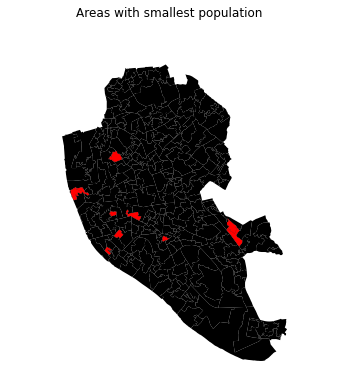

In [37]:
f, ax = plt.subplots(1, figsize=(6, 6))
# Base layer with all the areas for the background
geo_pop.plot(facecolor='black', linewidth=0.025, ax=ax)
# Smallest areas
smallest.plot(alpha=1, facecolor='red', linewidth=0, ax=ax)
ax.set_axis_off()
f.suptitle('Areas with smallest population')
plt.axis('equal')
plt.show()

---

## Exercise: Create a map of Liverpool with the two largest areas for each of the different population subgroups in a different color each.

---

### Spatial manipulations

In addition to operations purely based on values of the table, as above, `GeoDataFrame`s come built-in with a whole range of traditional GIS operations. Here we will run through a small subset of them that contains some of the most commonly used ones.

* Centroid calculation

Sometimes it is useful to summarize a polygon into a single point and, for that, a good candidate is its centroid (almost like a spatial analogue of the average). The following command will return a `GeoSeries` (a single column with spatial data) with the centroids of a polygon `GeoDataFrame`:

In [38]:
cents = geo_pop.centroid
cents.head()

0    POINT (336154.286 389733.636)
1    POINT (335535.928 390060.860)
2    POINT (335525.061 389484.402)
3    POINT (335117.436 389195.675)
4    POINT (335532.691 388692.842)
dtype: geometry

Note how `cents` is not an entire table but a single column, or a `GeoSeries` object. This means you can plot it directly, just like a table:

<AxesSubplot:>

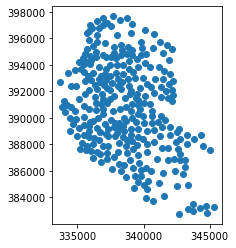

In [39]:
cents.plot()

But you don't need to call a `geometry` column to inspect the spatial objects. In fact, if you do it will return an error because there is not any `geometry` column, the object `cents` itself is the geometry.

---

## Exercise: Create a map with the polygons of Liverpool in the background and overlay on top of them their centroids.

<!--
f, ax = plt.subplots(1, figsize=(6, 6))
# Base layer with all the areas for the background
for poly in geo_pop['geometry']:
    gpd.plotting.plot_multipolygon(ax, poly, facecolor='black', linewidth=0.025)
# Smallest areas
cents.plot(axes=ax)
ax.set_axis_off()
f.suptitle('Areas with smallest population')
plt.axis('equal')
plt.show()
-->

---

* Point in polygon (PiP)

Knowing whether a point is inside a polygon is conceptually a straightforward exercise but computationally a tricky task to perform. The way to perform this operation in `GeoPandas` is through the `contains` method, available for each polygon object.

In [40]:
poly = geo_pop['geometry'][0]
pt1 = cents[0]
pt2 = cents[1]

In [41]:
poly.contains(pt1)

True

In [42]:
poly.contains(pt2)

False

Performing point-in-polygon in this way is instructive and useful for pedagogical reasons, but for cases with many points and polygons, it is not particularly efficient. In these situations, it is much more advisable to perform then as a "spatial join". If you are interested in these, see the link provided below to learn more about them. 

https://github.com/geopandas/geopandas/blob/master/examples/spatial_joins.ipynb 

---

## Exercise: This one is fairly advanced, so do not dispair if you cannot solve it. Find in which polygons the named places in `namp` fall into. Return, for each named place, the LSOA code in which it is located.

<!--
pip = []
for id, place in namp.iterrows():
    for pid, poly in geo_pop.iterrows():
        if poly.geometry.contains(place.geometry):
            pip.append((place.htmlname, poly.LSOA11CD))
pip = pd.DataFrame(pip, columns=['NamePlace', 'LSOA'])
-->

---

* Buffers

Buffers are one of the classical GIS operations in which an area is drawn around a particular geometry, given a specific radious. These are very useful, for instance, in combination with point-in-polygon operations to calculate accessibility, catchment areas, etc.

To create a buffer using `geopandas`, simply call the `buffer` method, passing in the radious. Mind that the radious needs to be specified in the same units as the CRS of the geography you are working with. For example, for the named places, we can consider their CRS:

In [43]:
namp.crs

<Projected CRS: EPSG:27700>
Name: OSGB 1936 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: UK - Britain and UKCS 49°46'N to 61°01'N, 7°33'W to 3°33'E
- bounds: (-9.2, 49.75, 2.88, 61.14)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: OSGB 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

These tells us it uses projection 27700 in the EPSG system. If we [look it up](http://epsg.io/27700), we will find that this corresponds with the Ordnance Survey projection, which is expressed in metres. Hence if we want, for example, a buffer of 500m. around each of these places, we can simply obtain it by:

In [44]:
buf = namp.buffer(500)
buf.head()

0    POLYGON ((340105.000 396261.000, 340102.592 39...
1    POLYGON ((340258.000 392357.000, 340255.592 39...
2    POLYGON ((340268.000 392217.000, 340265.592 39...
3    POLYGON ((340769.000 396567.000, 340766.592 39...
4    POLYGON ((340796.000 395304.000, 340793.592 39...
dtype: geometry

And plotting it is equally straighforward:

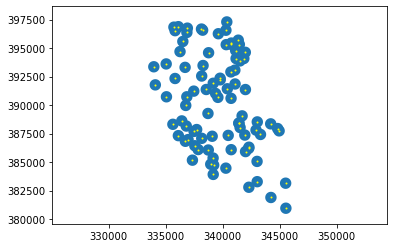

In [45]:
f, ax = plt.subplots(1)
# Plot buffer
buf.plot(ax=ax, linewidth=0)
# Plot named places on top for reference
# [NOTE how we modify the dot size (`markersize`)
# and the color (`color`)]
namp.plot(ax=ax, markersize=1, color='yellow')
plt.axis('equal')
plt.show()

---

## Exercise: Generate a map of the Liverpool polygons in black and overlay on top of them yellow buffers of 250 metres around each centroid.

<!--
f, ax = plt.subplots(1)
b250 = namp.buffer(250)
# Plot polys
for poly in lsoas['geometry']:
    gpd.plotting.plot_multipolygon(ax, poly, edgecolor='black', facecolor='black')
# Plot buffer
for poly in buf:
    gpd.plotting.plot_multipolygon(ax, poly, linewidth=0, facecolor='yellow')
plt.axis('equal')
plt.show()
-->


---

**NOTE** The folowing are extensions and as such are not required to complete this section. They are intended as additional resources to explore further possibilities that Python allows to play with representing spatial data.

## `[Extension I]` Adding base layers from web sources

A popular use of rasters is in the context of web tiles, which are a way of quickly obtaining geographical context to present spatial data. In Python, we can use [`contextily`](https://github.com/darribas/contextily) to pull down tiles and display them along with our own geographic data. Let us first import it the package:

In [46]:
import contextily as cx

We can begin by creating a map in the same way we would do normally, and then use the `add_basemap` command to, er, add a basemap:

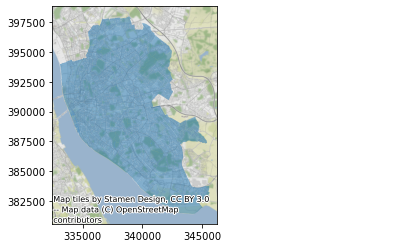

In [47]:
ax = lsoas.plot(alpha=0.5)
cx.add_basemap(ax, crs=lsoas.crs);

Note that we need to be explicit when adding the basemap to state the coordinate reference system (`crs`) our data is expressed in, `contextily` will not be able to pick it up otherwise. Conversely, we could change our data's CRS into [Pseudo-Mercator](http://epsg.io/3857), the native reference system for most web tiles:

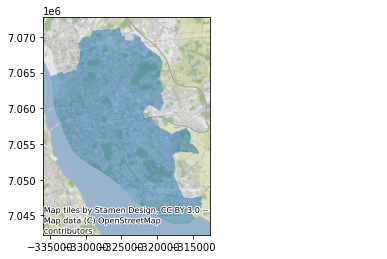

In [48]:
lsoas_wm = lsoas.to_crs(epsg=3857)
ax = lsoas_wm.plot(alpha=0.5)
cx.add_basemap(ax);

Note how the coordinates are different but, if we set it right, either approach aligns tiles and data nicely.

Web tiles can be integrated with other features of maps in a similar way as we have seen above. So, for example, we can change the size of the map, and remove the axis:

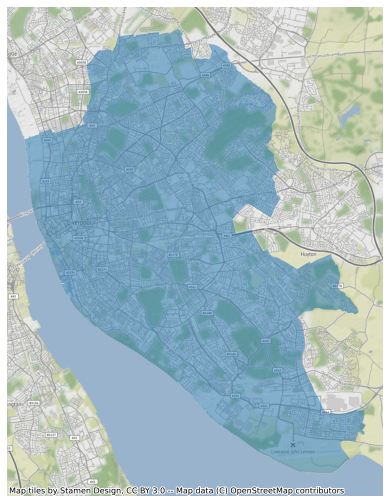

In [49]:
f, ax = plt.subplots(1, figsize=(9, 9))
lsoas_wm = lsoas.to_crs(epsg=3857)
lsoas_wm.plot(alpha=0.5, ax=ax)
cx.add_basemap(ax)
ax.set_axis_off()

Now, `contextily` offers a lot of options in terms of the sources and providers you can use to create your basemaps. For example, we can use satellite imagery instead:

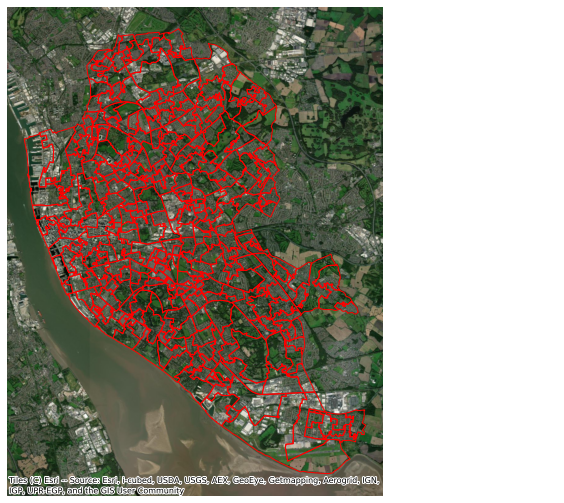

In [50]:
f, ax = plt.subplots(1, figsize=(9, 9))
lsoas_wm = lsoas.to_crs(epsg=3857)
lsoas_wm.plot(facecolor='none', edgecolor='red', ax=ax)
cx.add_basemap(ax, source=cx.providers.Esri.WorldImagery)
ax.set_axis_off()

Have a look at this Twitter thread by Dani Arribas-Bel to get some further ideas on providers:

In [51]:
from IPython.display import HTML
tweet = """
<blockquote class="twitter-tweet" data-lang="en"><p lang="et" dir="ltr">Terrain maps <a href="https://t.co/VtN9bGG5Mt">pic.twitter.com/VtN9bGG5Mt</a></p>&mdash; Dani Arribas-Bel (@darribas) <a href="https://twitter.com/darribas/status/1157297596689539072?ref_src=twsrc%5Etfw">August 2, 2019</a></blockquote>
<script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>
"""
HTML(tweet)

## `[Extension II]` Advanced GIS operations

* Spatial joins

> [https://github.com/geopandas/geopandas/blob/master/examples/spatial_joins.ipynb](https://github.com/geopandas/geopandas/blob/master/examples/spatial_joins.ipynb)

* Spatial overlays

> [https://github.com/geopandas/geopandas/blob/master/examples/overlays.ipynb](https://github.com/geopandas/geopandas/blob/master/examples/overlays.ipynb)

# Slightly more advanced: Data mapping

In this section, we will build on all we have learnt so far about loading and manipulating (spatial) data and apply it to one of the most commonly used forms of spatial analysis: choropleths. Remember these are maps that display the spatial distribution of a variable encoded in a color scheme, also called *palette*. Although there are many ways in which you can convert the values of a variable into a specific color, we will focus in this context only on a handful of them, in particular:

* Unique values.
* Equal interval.
* Quantiles.
* Fisher-Jenks.

In addition, we will cover how to add base maps that provide context from rasters and, in two optional extensions, will review two more additional ways of displaying data in maps: cartograms and conditional maps.

Before all this mapping fun, let us get the importing of libraries and data loading out of the way:

In [52]:
%matplotlib inline

import seaborn as sns
import pandas as pd
from pysal.viz import mapclassify
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

## Data

All the data is in the ``data`` folder. However, we document the process below if you would like to use it at some point for your own analysis.

For this tutorial, we will use the recently released 2015 Index of Multiple Deprivation (IMD) for England and Wales. This dataset can be most easily downloaded from the CDRC data store ([link](https://data.cdrc.ac.uk/dataset/cdrc-english-indices-of-deprivation-2015-geodata-pack-liverpool-e08000012)) and, since it already comes both in tabular as well as spatial data format (shapefile), it does not need merging or joining to additional geometries.

Although all the elements of the IMD, including the ranks and the scores themselves, are in the IMD dataset, we will also be combining them with additional data from the Census, to explore how deprivation is related to other socio-demographic characteristics of the area. For that we will revisit the Census Data Pack ([link](https://data.cdrc.ac.uk/dataset/cdrc-2011-census-data-packs-for-local-authority-district-liverpool-e08000012)) we used previously.

In order to create maps with a base layer that provides context, we will be using a raster file derived from [OS VectorMap District (Backdrop Raster)](https://www.ordnancesurvey.co.uk/business-and-government/products/vectormap-district.html) and available for download on [this link](http://darribas.org/gds19/content/labs/figs/lab04_liverpool.tif).

As usual, let us set the paths to the folders containing the files before anything so we can then focus on data analysis exclusively (keep in mind the specific paths will probably be different for your computer):

In [53]:
# This will be different on your computer and will depend on where
# you have downloaded the files
#imd_shp = 'data/E08000012/shapefiles/E08000012.gpkg'
imd_shp = 'data/IMD/E08000012/shapefiles/E08000012.shp'
imd_csv_files='data/IMD/E08000012/tables/'
liv_path = 'data/Liverpool/lab04_liverpool.tif'
data_path = 'data/Liverpool/'

Information regarding IMD indices are found in the tables under IMD/E08000012/tables. As you import it the csv, you can use imd_score.shape to see that there are about 55 columns. We will work with the 2015 data in this notebook. You can repeat the same analysis with 2019 data for practice. 

Printing out the columns tells us that the relevant columns we need for our analysis are IMD_Score and IMD_Rank, therefore we will extract those two columns along with the index: lsoa11cd, so that we can merge with other datasets. 

In [54]:
imd_data=pd.read_csv(imd_csv_files+'E08000012_2015.csv')
#imd_data.columns

**IMPORTANT**: the paths above might have look different in your computer. See [this introductory notebook](begin.html) for more details about how to set your paths.

* **IMD data**

Now we can load up the IMD data:

In [55]:
# Read the file in
imd_shp = gpd.read_file(imd_shp)
#we read the shape file, so that all the data points we have in imd_data 
#will correspond to a spatial unit. 

# Index it on the LSOA ID
imd_shp = imd_shp.rename(columns={'lsoa11cd':'LSOA11CD'})
imd_shp = imd_shp.set_index('LSOA11CD')
# Display summary
imd_shp.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 298 entries, E01006512 to E01033768
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   geometry  298 non-null    geometry
dtypes: geometry(1)
memory usage: 4.7+ KB


In [56]:
imd_scores=imd_data.iloc[:,0:4]
#dropping the column 'lsoa11nm' as it not required for our analysis.
#This is followed by renaming the columns for ease. 
imd_scores=imd_scores.drop(['lsoa11nm'],axis=1)
imd_scores=imd_scores.rename(columns={'lsoa11cd':'LSOA11CD','Index.of.Multiple.Deprivation..IMD..Score':'IMD_Score','Index.of.Multiple.Deprivation..IMD..Rank..where.1.is.most.deprived.':'IMD_Rank'})

#indexing the table with 'LSOA11CD'
imd_scores=imd_scores.set_index('LSOA11CD')
imd_scores

,IMD_Score,IMD_Rank
LSOA11CD,,
E01006512,25.612,10518
E01006513,25.911,10339
E01006514,37.644,5247
E01006515,58.992,1019
E01006518,63.373,662
...,...,...
E01033764,76.865,72
E01033765,57.107,1212
E01033766,18.647,15356


Note how while importing the shapefile we *index* the resulting table `imd` with the column `LSOA11CD`. Effectively, this means we are "naming" the rows, the same way we the columns are named, using the column `LSOA11CD`, which contains the unique ID's of each area. This affords us some nice slicing and querying capabilities as well as permitting to merge the table with other ones more easily. 

Pay attention also to how exactly we index the table: we create a new object that is named in the same way, `imd`, but that contains the result of applying the function `set_index` to the original object `imd`. As usual, there are many ways to index a table in Python, but this is one of the most direct and expressive ones.

In [57]:
#Joining data from shape file and imd_scores 
imd=imd_shp.join(imd_scores)
imd

,geometry,IMD_Score,IMD_Rank
LSOA11CD,,,
E01006512,"POLYGON ((335888.000 390042.000, 336203.000 39...",25.612,10518
E01006513,"POLYGON ((335374.808 390547.998, 335405.406 39...",25.911,10339
E01006514,"POLYGON ((335650.536 389928.121, 335677.916 38...",37.644,5247
E01006515,"POLYGON ((335178.000 389642.000, 335222.397 38...",58.992,1019
E01006518,"POLYGON ((335528.316 389067.946, 335612.896 38...",63.373,662
...,...,...,...
E01033764,"POLYGON ((334934.507 393421.201, 334921.819 39...",76.865,72
E01033765,"POLYGON ((335087.000 388951.000, 335125.000 38...",57.107,1212
E01033766,"POLYGON ((338804.207 388364.881, 338831.644 38...",18.647,15356


* **Census data**

In order to explore additional dimensions of deprivation, and to have categorical data to display with "unique values" choropleths, we will use some of the Census data pack. Although most of the Census variables are continuous, we will transform them to create *categorical* characteristics. Remember a categorical variable is one that comprises only a limited number of potential values, and these are not comparable with each other across a numerical scale. For example, religion or country of origin are categorical variables. It is not possible to compare their different values in a quantitative way (religion A is not double or half of religion B) but instead they represent qualitative differences.

In particular, we are going to use tables `QS104EW` (Gender) and `KS103EW` (marital status) from the folder **Liverpool**. The way these are presented in its raw form is as tabulated counts of each of the possible categories. Our strategy to turn these into a single categorical variable for each case is to compare the counts for each area and assign that of the largest case. For example, in the first case, an area will be labelled as "male" if there are more males than females living in that particular LSOA. In the case of marital status, although there are more cases, we will simplify and use only "married" and "single" and assign one or the other on the bases of which ones are more common in each particular area.

**NOTE**: the following code snippet involves some data transformations that are a bit more advanced that what is covered in this course. Simply run them to load the data, but you are not expected to know some of the coding tricks required in this cell.

In [58]:
                # Gender breakup
# Read table (csv file)
import pandas as pd
gender = pd.read_csv(data_path+'tables/QS104EW_lsoa11.csv', index_col='GeographyCode')
# Rename columns from code to human-readable name
gender = gender.rename(columns={'QS104EW0002': 'Male', \
                                'QS104EW0003': 'Female'})[['Male', 'Female']]
# Create male-female switcher
maj_male = gender['Male'] > gender['Female']
# Add "Gender_Majority" variable to table and assign the switcher
gender['Gender_Majority'] = maj_male
# Replace `True` values with "Male" and `False` with "Female"
gender.loc[gender['Gender_Majority']==True, 'Gender_Majority'] = 'Male'
gender.loc[gender['Gender_Majority']==False, 'Gender_Majority'] = 'Female'

                # Status breakup
# Read table (csv file)
sinmar = pd.read_csv(data_path+'tables/KS103EW_lsoa11.csv', index_col='GeographyCode')
# Rename columns from code to human-readable name
sinmar = sinmar.rename(columns={'KS103EW0002': 'Single', \
                                'KS103EW0003': 'Married'})[['Single', 'Married']]
# Create sigle-married switcher
maj_sin = sinmar['Single'] > sinmar['Married']
# Add "Status_Majority" variable to table and assign the switcher
sinmar['Status_Majority'] = maj_sin
# Replace `True` values with "Single" and `False` with "Married"
sinmar.loc[sinmar['Status_Majority']==True, 'Status_Majority'] = 'Single'
sinmar.loc[sinmar['Status_Majority']==False, 'Status_Majority'] = 'Married'

# Join
both = imd.join(sinmar).join(gender)
# Reset the CRS after join
both.crs = imd.crs

This creates the table we will be using for the rest of the session:

In [59]:
both.head()

,geometry,IMD_Score,IMD_Rank,Single,Married,Status_Majority,Male,Female,Gender_Majority
LSOA11CD,,,,,,,,,
E01006512,"POLYGON ((335888.000 390042.000, 336203.000 39...",25.612,10518,1288,287,Single,1070,810,Male
E01006513,"POLYGON ((335374.808 390547.998, 335405.406 39...",25.911,10339,2613,170,Single,1461,1480,Female
E01006514,"POLYGON ((335650.536 389928.121, 335677.916 38...",37.644,5247,1583,204,Single,1177,931,Male
E01006515,"POLYGON ((335178.000 389642.000, 335222.397 38...",58.992,1019,587,218,Single,595,613,Female
E01006518,"POLYGON ((335528.316 389067.946, 335612.896 38...",63.373,662,716,363,Single,843,853,Female


A look at the variables reveals that, in effect, we have successfuly merged the IMD data with the categorical variables derived from Census tables:

In [60]:
both.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 298 entries, E01006512 to E01033768
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   geometry         298 non-null    geometry
 1   IMD_Score        298 non-null    float64 
 2   IMD_Rank         298 non-null    int64   
 3   Single           298 non-null    int64   
 4   Married          298 non-null    int64   
 5   Status_Majority  298 non-null    object  
 6   Male             298 non-null    int64   
 7   Female           298 non-null    int64   
 8   Gender_Majority  298 non-null    object  
dtypes: float64(1), geometry(1), int64(5), object(2)
memory usage: 33.3+ KB


Now we are fully ready to map!

## Choropleths

### Unique values

A choropleth for categorical variables simply assigns a different color to every potential value in the series. The main requirement in this case is then for the color scheme to reflect the fact that different values are not ordered or follow a particular scale.

In Python, thanks to `geopandas`, creating categorical choropleths is possible with one line of code. To demonstrate this, we can plot the spatial distribution of LSOAs with a more female population than male and viceversa:

<AxesSubplot:>

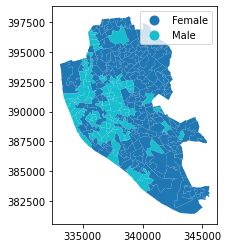

In [61]:
both.plot(column='Gender_Majority', categorical=True, 
          legend=True, linewidth=0.1)

Let us stop for a second in a few crucial aspects:

* Note how we are using the same approach as for basic maps, the command `plot`, but we now need to add the argument `column` to specify which column in particular is to be represented.
* Since the variable is categorical we need to make that explicit by setting the argument `categorical` to `True`.
* As an optional argument, we can set `legend` to `True` and the resulting figure will include a legend with the names of all the values in the map.
* Unless we specify a different colormap, the selected one respects the categorical nature of the data by not implying a gradient or scale but a qualitative structure.

---

## Exercise: Create a categorical map of the marital status in Liverpool. Where are the areas with more married than single population?

---

### Equal interval

If, instead of categorical variables, we want to display the geographical distribution of a continuous phenomenon, we need to select a way to encode each value into a color. One potential solution is applying what is usually called "equal intervals". The intuition of this method is to split the *range* of the distribution, the difference between the minimum and maximum value, into equally large segments and to assign a different color to each of them according to a palette that reflects the fact that values are ordered.

Using the example of the position of a LSOA in the national ranking of the IMD (`IMD_Rank`), we can calculate these segments, also called bins or buckets, using the library `PySAL` (which we imported at the starting of the section):

In [62]:
classi = mapclassify.EqualInterval(imd['IMD_Rank'], k=7)
classi

EqualInterval               

      Interval         Count
----------------------------
[   24.00,  4604.86] |   156
( 4604.86,  9185.71] |    48
( 9185.71, 13766.57] |    30
(13766.57, 18347.43] |    21
(18347.43, 22928.29] |    24
(22928.29, 27509.14] |    14
(27509.14, 32090.00] |     5

The only additional argument to pass to `Equal_Interval`, other than the actual variable we would like to classify is the number of segments we want to create, `k`, which we are arbitrarily setting to seven in this case. This will be the number of colors that will be plotted on the map so, although having several can give more detail, at some point the marginal value of an additional one is fairly limited, given the ability of the brain to tell any differences.

Once we have classified the variable, we can check the actual break points where values stop being in one class and become part of the next one:

In [63]:
classi.bins

array([ 4604.85714286,  9185.71428571, 13766.57142857, 18347.42857143,
       22928.28571429, 27509.14285714, 32090.        ])

The array of breaking points above implies that any value in the variable below 4604.9 will get the first color in the gradient when mapped, values between 4604.9 and 9185.7 the next one, and so on.

The key characteristic in equal interval maps is that the bins are allocated based on the magnitude on the values, irrespective of how many obervations fall into each bin as a result of it. In highly skewed distributions, this can result in bins with a large number of observations, while others only have a handful of outliers. This can be seen in the submmary table printed out above, where 156 LSOAs are in the first group, but only five of them belong to the one with highest values. This can also be represented visually with a kernel density plot where the break points are included as well:

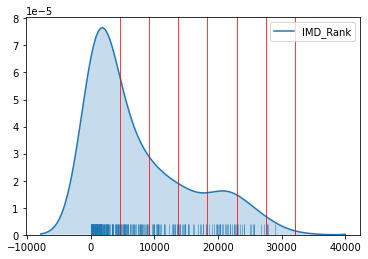

In [64]:
# Set up the figure
f, ax = plt.subplots(1)
# Plot the kernel density estimation (KDE)
sns.kdeplot(imd['IMD_Rank'], shade=True)
# Add a blue tick for every value at the bottom of the plot (rugs)
sns.rugplot(imd['IMD_Rank'], alpha=0.5)
# Loop over each break point and plot a vertical red line
for cut in classi.bins:
    plt.axvline(cut, color='red', linewidth=0.75)
# Display image
plt.show()

Technically speaking, the figure is created by overlaying a KDE plot with vertical bars for each of the break points. This makes much more explicit the issue highlighed by which the first bin contains a large amount of observations while the one with top values only encompasses a handful of them.

To create a map that displays the colors assigned by the equal interval classification algorithm, we use a similar approach as with unique values but with some key differences:

<AxesSubplot:>

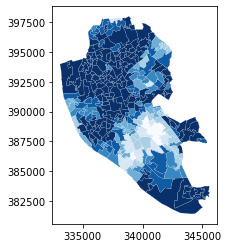

In [65]:
imd.plot(column='IMD_Rank', scheme='equal_interval', k=7, 
         cmap=plt.cm.Blues_r, alpha=1, 
         edgecolor='w', linewidth=0.1)

Pay attention to the key differences:

* Instead of specifying `categorical` as `True`, we replace it by the argument `scheme`, which we will use for all choropleths that require a continuous classification scheme. In this case, we set it to `equal_interval`.
* As above, we set the number of colors to 7. Note that we need not pass the bins we calculated above, the plotting method does it itself under the hood for us.
* As optional arguments, we can change the colormap to a blue gradient, which is one of the recommended ones by [ColorBrewer](http://colorbrewer2.org/) for a sequential palette. **NOTE** also how we use an appropriate palette: `IMD_Rank` goes from most to least deprived to, so we apply a palette (`Blues_r`, where the `_r` stands for reverse) for which the **smaller values are encoded in darker blue**.
* Equally optional, some of the arguments we learned with basic maps, such as the degree of transparency, also apply in this context.

Substantively, the map also makes very explicit the fact that many areas are put into the same bin as the amount of white polygons is very large.

---

## Exercise: Create an equal interval kde plot and map of the actual score of the IMD (`IMD_Score`). Is the same palette appropriate?

As a bonus, try including a legend in the map, following a similar approach as in unique values maps.

---

### Quantiles

One solution to obtain a more balanced classification scheme is using quantiles. This, by definition, assigns the same amount of values to each bin: the entire series is laid out in order and break points are assigned in a way that leaves exactly the same amount of observations between each of them. This "observation-based" approach contrasts with the "value-based" method of equal intervals and, although it can obscure the magnitude of extreme values, it can be more informative in cases with skewed distributions.

Calculating a quantiles classification with `PySAL` can be done with the following line of code:

In [66]:
classi = mapclassify.Quantiles(imd['IMD_Rank'], k=7)
classi

Quantiles                   

      Interval         Count
----------------------------
[   24.00,   633.71] |    43
(  633.71,  1335.71] |    42
( 1335.71,  2641.00] |    43
( 2641.00,  5540.14] |    42
( 5540.14, 10355.86] |    43
(10355.86, 18401.14] |    42
(18401.14, 32090.00] |    43

And, similarly, the bins can also be inspected:

In [67]:
classi.bins

array([  633.71428571,  1335.71428571,  2641.        ,  5540.14285714,
       10355.85714286, 18401.14285714, 32090.        ])

The visualization of the distribution can be generated in a similar way as well:

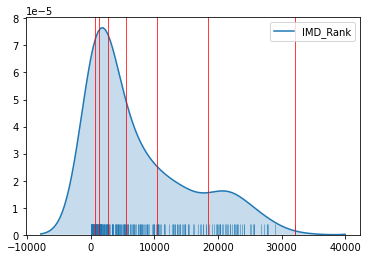

In [68]:
# Set up the figure
f, ax = plt.subplots(1)
# Plot the kernel density estimation (KDE)
sns.kdeplot(imd['IMD_Rank'], shade=True)
# Add a blue tick for every value at the bottom of the plot (rugs)
sns.rugplot(imd['IMD_Rank'], alpha=0.5)
# Loop over each break point and plot a vertical red line
for cut in classi.bins:
    plt.axvline(cut, color='red', linewidth=0.75)
# Display image
plt.show()

And the choropleth also follows a similar pattern, with the difference that we are now using the scheme "quantiles", instead of "equal interval":

<AxesSubplot:>

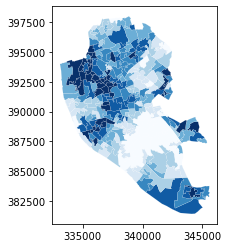

In [69]:
imd.plot(column='IMD_Rank', scheme='QUANTILES', alpha=1, k=7, \
         cmap=plt.cm.Blues_r, 
         edgecolor='w', linewidth=0.1)

Note how, in this case, the amount of polygons in each color is by definition much more balanced (almost equal in fact, except for rounding differences). This obscures outlier values, which get blurred by significantly smaller values in the same group, but allows to get more detail in the "most populated" part of the distribution, where instead of only white polygons, we can now discern more variability.

---

## Exercise: Create a quantile kde plot and map of the actual score of the IMD (`IMD_Score`). 

As a bonus, make a map with 50% of transparency and no boundary lines.

---

### Fisher-Jenks

Equal interval and quantiles are only two examples of very many classification schemes to encode values into colors. Although not all of them are integrated into `geopandas`, `PySAL` includes several other classification schemes (for a detailed list, have a look at this [link](http://pysal.readthedocs.org/en/latest/library/esda/mapclassify.html)). As an example of a more sophisticated one, let us create a Fisher-Jenks choropleth:

In [70]:
classi = mapclassify.FisherJenks(imd['IMD_Rank'], k=7)
classi

FisherJenks                 

      Interval         Count
----------------------------
[   24.00,  2930.00] |   133
( 2930.00,  6946.00] |    52
( 6946.00, 11656.00] |    39
(11656.00, 16185.00] |    24
(16185.00, 20719.00] |    20
(20719.00, 24098.00] |    18
(24098.00, 32090.00] |    12

This methodology aims at minimizing the variance *within* each bin while maximizing that *between* different classes.

In [71]:
classi.bins

array([ 2930,  6946, 11656, 16185, 20719, 24098, 32090])

Graphically, we can see how the break points are not equally spaced but are adapting to obtain an optimal grouping of observations:

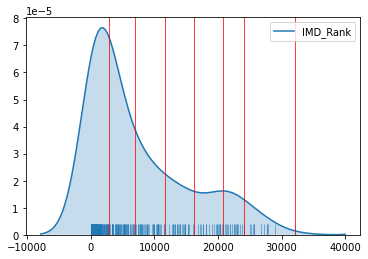

In [72]:
# Set up the figure
f, ax = plt.subplots(1)
# Plot the kernel density estimation (KDE)
sns.kdeplot(imd['IMD_Rank'], shade=True)
# Add a blue tick for every value at the bottom of the plot (rugs)
sns.rugplot(imd['IMD_Rank'], alpha=0.5)
# Loop over each break point and plot a vertical red line
for cut in classi.bins:
    plt.axvline(cut, color='red', linewidth=0.75)
# Display image
plt.show()

Technically, however, the way to create a Fisher-Jenks map is exactly the same as before:

<AxesSubplot:>

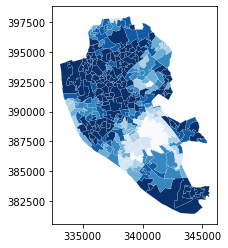

In [73]:
imd.plot(column='IMD_Rank', scheme='fisher_jenks', 
         alpha=1, k=7, cmap=plt.cm.Blues_r, 
         edgecolor='w', linewidth=0.1)

## Raster basemaps

This section requires the additional library `rasterio`:

In [74]:
import rasterio

Since choropleths tend to be based on administrative boundaries which do not necessarily reflect correctly the topography of a region, it may be of interest to provide a choropleth with certain geographical context. If data are available, one way to deliver this is by plotting a base raster map underneath the choropleth and allowing some transparency on the upper layer.

To do this in Python, we can combine the plotting of a raster image with the generation of a choropleth as we have seen above. First, we need to read the raster in:

In [75]:
# Open the raster file
src = rasterio.open(liv_path)
# Extract the bounds
left, bottom, right, top = src.bounds

At this point we are ready to generate the figure with both layers:

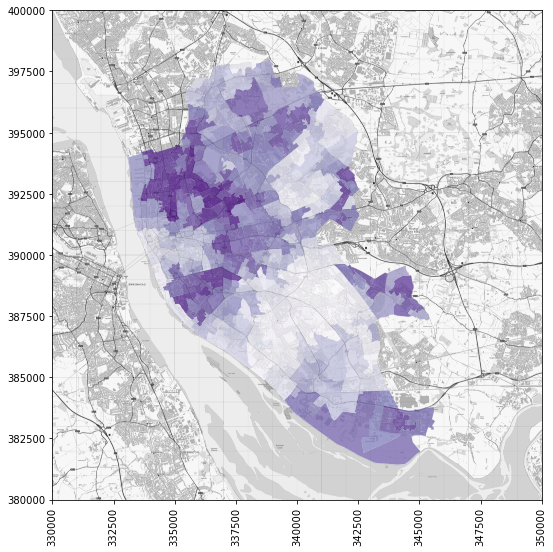

In [76]:
# NOTE: this may take a little bit to run depending on your machine

# Set up the figure
f, ax = plt.subplots(1, figsize=(9, 9))
# Add raster layer
ax.imshow(src.read(1), cmap='gray', extent=(left, right, bottom, top))
# Create the choropleth
imd.plot(column='IMD_Score', cmap='Purples', 
         linewidth=0.1, alpha=0.75, ax=ax)
# Style the labels for the ticks
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
# Keep axes proportionate
#plt.axis('equal')
# Display
plt.show()

Note how the way the raster is added to the axis is different that the way we attach a vector map: the raster gets plotted through `imshow` (image show), which is a function embedded in the axis object (`ax`), while the vector object is appended by passing the axis (`ax`) through the plotting method itself.

## Zooming into the map

A general map of an entire region, or urban area, can sometimes obscure particularly local patterns because they happen at a much smaller scale that cannot be perceived in the global view. One way to solve this is by providing a focus of a smaller part of the map in a separate figure. Although there are many ways to do this in Python, the most straightforward one is to reset the limits of the axes to center them in the area of interest.

As an example, let us consider the quantile map produced above:

<AxesSubplot:>

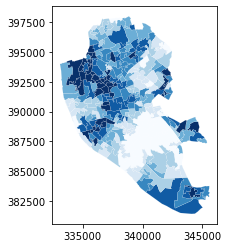

In [77]:
imd.plot(column='IMD_Rank', scheme='QUANTILES', 
         alpha=1, k=7, cmap=plt.cm.Blues_r, 
         edgecolor='w', linewidth=0.1)

If we want to focus on the city centre, say the area of the map more or less between coordinates 387,000 and 391,000 on the vertical axis, and 332,000 and 337,000 on the horizontal one, creating the figure involves the following:

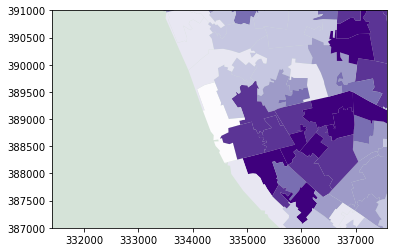

In [78]:
# Setup the figure
f, ax = plt.subplots(1)
# Set background color of the axis
ax.set_facecolor('#D5E3D8')
# Draw the choropleth
imd.plot(column='IMD_Rank', scheme='QUANTILES', k=7, \
         cmap=plt.cm.Purples_r, ax=ax)
# [Optional] Keep axes proportionate
plt.axis('equal')
# Redimensionate X and Y axes to desired bounds
ax.set_ylim(387000, 391000)
ax.set_xlim(332000, 337000)
# Show image
plt.show()

Note how, if we decide to keep the axes proportionate, it needs to be done *before* resetting the limits, as otherwise the change will not have an effect.